## simple shock analysis
    

In [1]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import copy

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
data_path='/nas/helio/data/insitu_python/'
#filewin=data_path+'wind_2018_2020_oct_gse.p'
filewin=data_path+'wind_2007_2018_heeq_helcats.p'
[winall,hwinall]=pickle.load(open(filewin, "rb" ) )

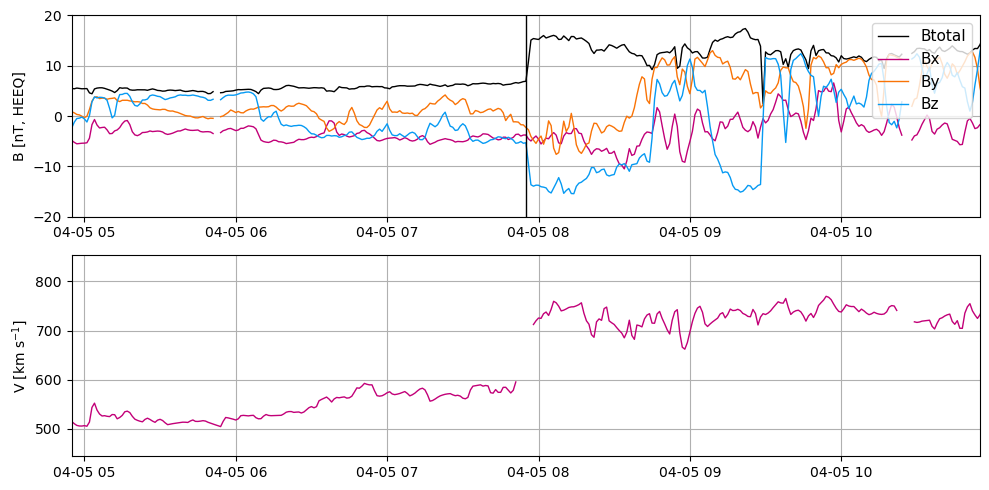

In [7]:
%matplotlib inline

#define shock time
shock_time=datetime.datetime(2010,4,5,7,55,0)


#2010-02-07 18:04
#shock_time=datetime.datetime(2010,2,7,18,4,0)



#slice data around the shock for 24 hours
shock_index_all=np.where(shock_time<winall.time)[0][0]
win=copy.deepcopy(winall[shock_index_all-(24*60):shock_index_all+(24*60)])


#find index of shock data point in sliced data
shock_index=np.where(shock_time<win.time)[0][0]


#interval for plotting around shock, in fraction of days
plotint=3/24

#limits for magnetic field
blim=20


############### make figure
plt.figure(1,figsize=(10, 5),dpi=100)
plt.title('Wind MFI')

#define subplot grid
ax3 = plt.subplot2grid((2, 1), (0, 0))  #
ax4 = plt.subplot2grid((2, 1), (1, 0))  #


ax3.plot(win.time, win.bt, "k-", lw=1,label='Btotal')
ax3.plot(win.time, win.bx,'-r', color="xkcd:magenta",linewidth=1,label='Bx')
ax3.plot(win.time, win.by, "g-", color="xkcd:orange", lw=1,label='By')
ax3.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bz')

#plot vertical lines
ax3.plot_date([shock_time,shock_time],[-500,500],'-k',linewidth=1)            
ax3.set_ylabel('B [nT, HEEQ]')
ax3.set_xlim(mdates.date2num(shock_time)-plotint,mdates.date2num(shock_time)+plotint)
ax3.set_ylim(-blim,blim)
ax3.legend(loc=1,ncol=1,fontsize=11)
ax3.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1/24*6))
ax3.grid(True)

ax4.plot(win.time, win.vt, color="xkcd:magenta",linewidth=1,label='Vp Wind')
ax4.set_xlim(mdates.date2num(shock_time)-plotint,mdates.date2num(shock_time)+plotint)
ax4.set_ylabel('V [km $\mathrm{s^{-1}}$]')
ax4.set_xlim(mdates.date2num(shock_time)-plotint,mdates.date2num(shock_time)+plotint)
#ax4.set_ylim(100,550)
ax4.grid(True)

plt.tight_layout()

In [20]:
print('shock analysis with the co-planarity theorem, Kivelson & Russell 1995, Chapter 5.2.2')
print()

#select data
#from 15 min to 5 minutes before the shock and after: make averages
#bu means upstream, before the shock
bu=np.array([np.mean(win.bx[shock_index-10:shock_index-5]),np.mean(win.by[shock_index-10:shock_index-5]),np.mean(win.bz[shock_index-10:shock_index-5]) ])
#bd downstream, after the shock
bd=np.array([np.mean(win.bx[shock_index+5:shock_index+10]),np.mean(win.by[shock_index+5:shock_index+10]),np.mean(win.bz[shock_index+5:shock_index+10]) ])

#make parameters
bm1=bu-bd
bc=np.cross(bu,bd)

#coplanarity formula
nshock=np.cross(bm1,bc)/np.linalg.norm(np.cross(bm1,bc))

#the result for the shock normal is 180 deg uncertain -> change sign if not radially pointing away from the Sun (X > 0)
if nshock[0]<0: nshock=-nshock
    
print('shock normal Ns in HEEQ (orientation similar to RTN)',np.round(nshock,2))

angle_to_radial=np.arccos(np.dot(np.array([1,0,0]),nshock) )
print('absolute angle to radial direction    ',np.round(abs(angle_to_radial*180/np.pi),1),'deg')                                                               

angle_to_x_in_xy_plane=np.arctan(nshock[1]/nshock[0])
print('angle to x direction                 ',np.round(angle_to_x_in_xy_plane*180/np.pi,1),'deg (negative => east, positive => west)')                                                               



#alfven mach number with speed components
#----------------

#theta_bn angle between bu and nshock to determine parallel, perpendicular and oblique shock
theta_bn=np.arccos(np.dot(bu/np.linalg.norm(bu),nshock) )*180/np.pi
#theta must be between 0 and 90 (not fully sure if this is ok)
#print(theta_bn)
if theta_bn > 90: theta_bn=np.arccos(np.dot(bu/np.linalg.norm(bu),-nshock) )*180/np.pi

print('theta_bn                             ',np.round(theta_bn,1),'deg'   )                                                            


shock analysis with the co-planarity theorem, Kivelson & Russell 1995, Chapter 5.2.2

shock normal Ns in HEEQ (orientation similar to RTN) [ 0.97 -0.24  0.05]
absolute angle to radial direction     14.2 deg
angle to x direction                  -14.0 deg (negative => east, positive => west)
theta_bn                              45.6 deg
